# Naive Bayes Classifier

Classifies data with Baye's theorem, by labeling problem instances (i.e. feature vectors).  The "naive" part is in the assumptions we make:

- Each feature is independent from all the others.
- The data follows a normal distribution.

Naive Bayes Classifiers see the trees, but not the forest.

In [3]:
import sys
import numpy
from matplotlib import pyplot
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
import scikitplot

import ipywidgets as widgets
from IPython.display import display

sys.path.append("../")

from common import util, common_widgets

## The Data

In [4]:
# Path to a CSV file
data_file = 'data_multivar_nb.txt'

data = numpy.loadtxt(data_file, delimiter=',')

# The first two attributes in each row are data points, the third is the class
features = data[:, :-1]
classes = data[:, -1]

print(len(features), "data points")

400 data points


## The Classifier: All Data

All data is used for the training here.  The problem is that if you test a model with the same data used to train it,  the results aren't reliable for new data.

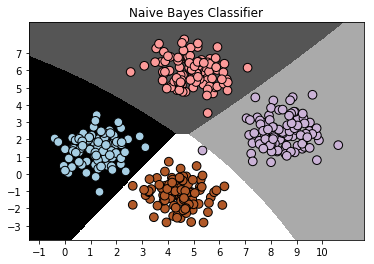

Accuracy: 99.75% guesses correct


In [5]:
def classify_all():

    classifier = GaussianNB()
    classifier.fit(features, classes)

    class_predictions = classifier.predict(features)

    accuracy = 100.0 * (classes == class_predictions).sum() / features.shape[0]

    util.visualize_classifier(classifier, features, classes, "Naive Bayes Classifier")

    print("Accuracy: {:.2f}% guesses correct".format(accuracy))

classify_all()

## The Classifier: A Better Split

In [6]:
def classify_split(test_size=0.2, num_folds=3, random_state=0):
    split = model_selection.train_test_split(features, classes, test_size=test_size, random_state=random_state)
    features_train, features_test = split[0], split[1]
    class_train, class_test = split[2], split[3]
    
    classifier = GaussianNB()
    classifier.fit(features_train, class_train)
    class_predictions = classifier.predict(features_test)
    
    accuracy = 100.0 * (class_test == class_predictions).sum() / features_test.shape[0]
    accuracy_values = model_selection.cross_val_score(classifier, features, classes, scoring='accuracy', cv=num_folds, n_jobs=-1)
    precision_values = model_selection.cross_val_score(classifier, features, classes, scoring='precision_weighted', cv=num_folds, n_jobs=-1)
    recall_values = model_selection.cross_val_score(classifier, features, classes, scoring='recall_weighted', cv=num_folds, n_jobs=-1)
    f1_values = model_selection.cross_val_score(classifier, features, classes, scoring='f1_weighted', cv=num_folds, n_jobs=-1)
    
    
    util.visualize_classifier(classifier, features_test, class_test, "Less-Naive Bayes Classifier")

    print("Classifier Accuracy: {:.2f}% guesses correct".format(accuracy))
    print("Accuracy: {:.2f}%".format(accuracy_values.mean() * 100.0))
    print("Precision: {:.2f}%".format(precision_values.mean() * 100.0))
    print("Recall: {:.2f}%".format(recall_values.mean() * 100.0))
    print("F1: {:.2f}%".format(f1_values.mean() * 100.0))


widgets.interactive(
    classify_split,
    test_size=common_widgets.test_size,
    num_folds=common_widgets.num_folds,
    random_state=common_widgets.random_seed
)


interactive(children=(FloatSlider(value=0.2, continuous_update=False, description='% Test Data', max=0.95, min…